In [1]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_anc_c'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_anc_c/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_anc.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_anc.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_anc.npy"), S_var)

In [3]:
for L in [6,7,8,9]:
    for T in [10.0*L]:
        for p in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            for d in ["Z"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,500,10*L)

In [4]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc_c'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Emean_L6,T60.0,dt1.0,p0.2_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6
Moved Emean_L7,T70.0,dt1.0,p0.7_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_7
Moved Emean_L8,T80.0,dt1.0,p0.4_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_8
Moved Evar_L7,T70.0,dt1.0,p1.0_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_7
Moved Evar_L8,T80.0,dt1.0,p0.9_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_8
Moved Emean_L9,T90.0,dt1.0,p0.1_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_9
Moved Evar_L8,T80.0,dt1.0,p0.0_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_8
Moved Evar_L9,T90.0,dt1.0,p0.5_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_9
Moved Emean_L9,T90.0,dt1.0,p0.8_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_9
Moved Evar_L6,T60.0,dt1.0,p0.6_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6
Moved Evar_L7,T70.0,dt1.0,p0.3_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc_

In [5]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc_c'

# List of L values
L_list = [6, 7, 8, 9, 10, 11]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Moved Evar_L6,T60.0,dt1.0,p0.6_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.7_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.5_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.4_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.1_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.8_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.9_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.0_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.2_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.3_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc_c/L_6/var
Moved Evar_L6,T60.0,dt1.0,p1.0_anc.npy t

In [6]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc_c'

# List of L values you want to process
L_values = [5, 6, 7, 8, 9]

# Loop through each L value
for L in L_values:
    # Create the directory path dynamically based on L
    data_dir = os.path.join(base_dir, f'L_{L}')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the first data points
    last_data_points = []

    # Loop through the files and collect the first data point
    for file_name in file_list:
        data = np.load(os.path.join(data_dir, file_name))
        last_data_points.append(data[-1])  # Collect first data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Directory for L=5 not found: /Users/uditvarma/Documents/s3_data/mean_anc_c/L_5
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_anc_c/timeT_points_L6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_anc_c/timeT_points_L7.npy
Data for L=8 saved to: /Users/uditvarma/Documents/s3_data/mean_anc_c/timeT_points_L8.npy
Data for L=9 saved to: /Users/uditvarma/Documents/s3_data/mean_anc_c/timeT_points_L9.npy


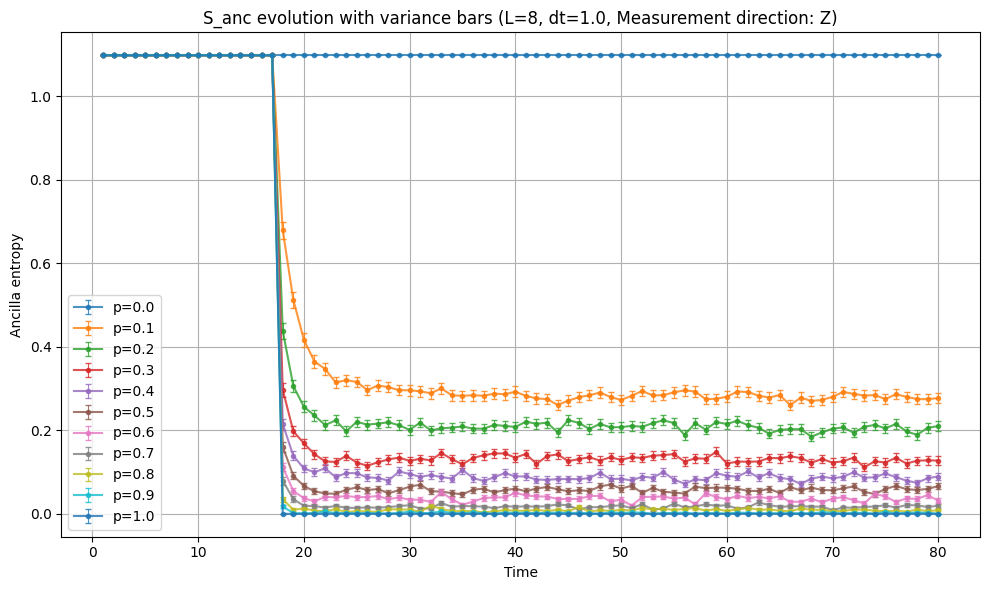

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc_c/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Ancilla entropy')
plt.title('S_anc evolution with variance bars (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

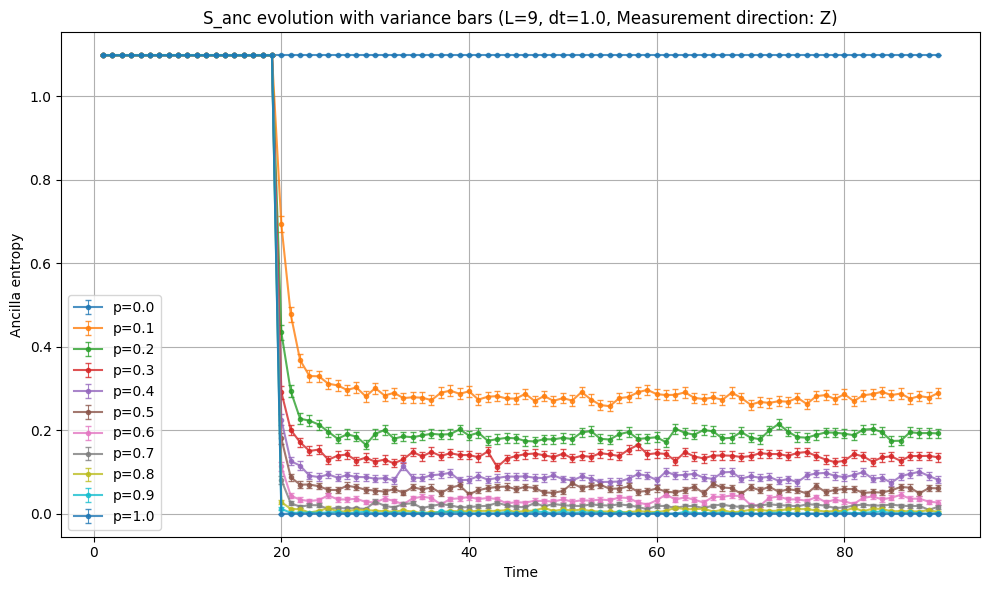

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc_c/L_9"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Ancilla entropy')
plt.title('S_anc evolution with variance bars (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

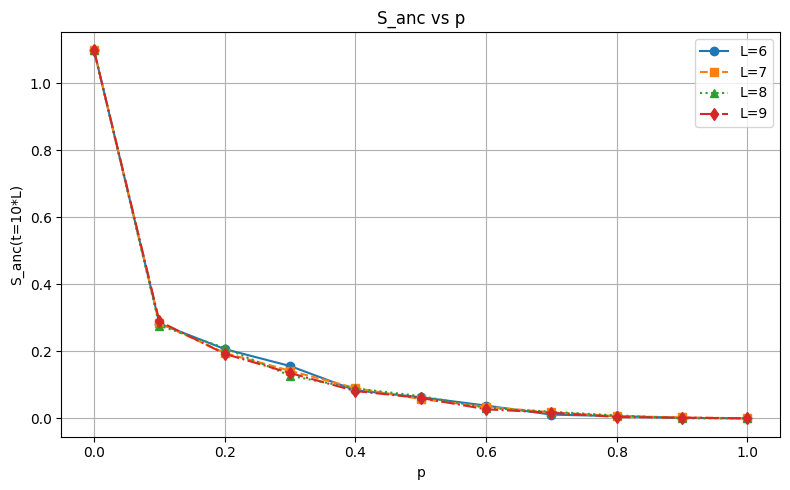

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8, 9]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc_c'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)],data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S_anc vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig('S_hc_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

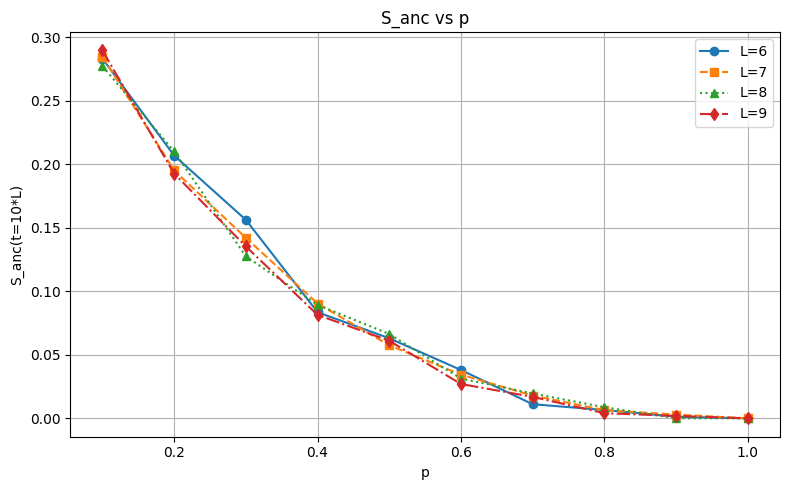

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc_c'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)-1],data[1:11],  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S_anc vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig('S_hc_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')